In [87]:
import numpy
import random

import qiskit
from qiskit import __version__
print(__version__)
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, array_to_latex
from qiskit.result import marginal_distribution
from qiskit.circuit.library import UGate   


2.1.2


Quantum Teleportation

In [88]:
qubit = QuantumRegister(1, "Q")
ebit_0 = QuantumRegister(1, "A")
ebit_1 = QuantumRegister(1, "B")

a = ClassicalRegister(1, "a")
b = ClassicalRegister(1, "b")

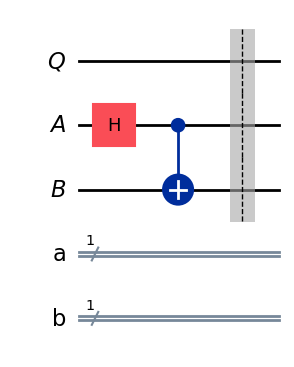

In [89]:
teleportation_protocol = QuantumCircuit(qubit, ebit_0, ebit_1, a, b)

# entangle ebit for teleportation
teleportation_protocol.h(ebit_0)
teleportation_protocol.cx(ebit_0, ebit_1)
teleportation_protocol.barrier()

teleportation_protocol.draw('mpl')


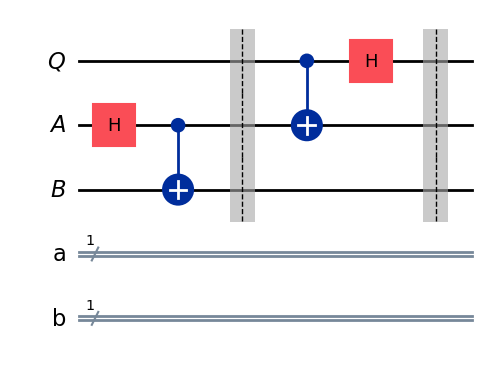

In [90]:
# Alice's Operations

teleportation_protocol.cx(qubit, ebit_0)
teleportation_protocol.h(qubit)
teleportation_protocol.barrier()

teleportation_protocol.draw('mpl')

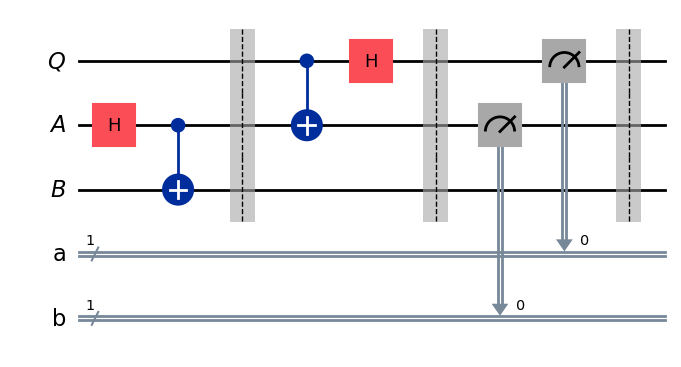

In [ ]:
teleportation_protocol.measure(ebit_0, a)
teleportation_protocol.measure(qubit, b)

teleportation_protocol.barrier()

teleportation_protocol.draw('mpl')

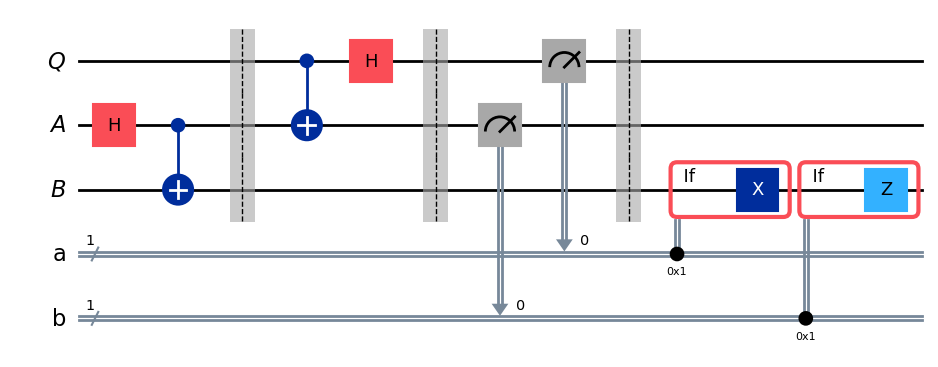

In [92]:
with teleportation_protocol.if_test((a, 1)):
    teleportation_protocol.x(ebit_1)
with teleportation_protocol.if_test((b, 1)):
    teleportation_protocol.z(ebit_1)

teleportation_protocol.draw('mpl')

Test w/ random gate applied to Q

In [93]:
random_gate = UGate(
    theta=random.random() * 2 * numpy.pi,
    phi=random.random() * 2 * numpy.pi,
    lam=random.random() * 2 * numpy.pi
)

random_gate.to_matrix()

array([[ 0.82875577+0.j        ,  0.53843773-0.15247522j],
       [-0.39791308+0.39348324j,  0.4082198 -0.72124387j]])

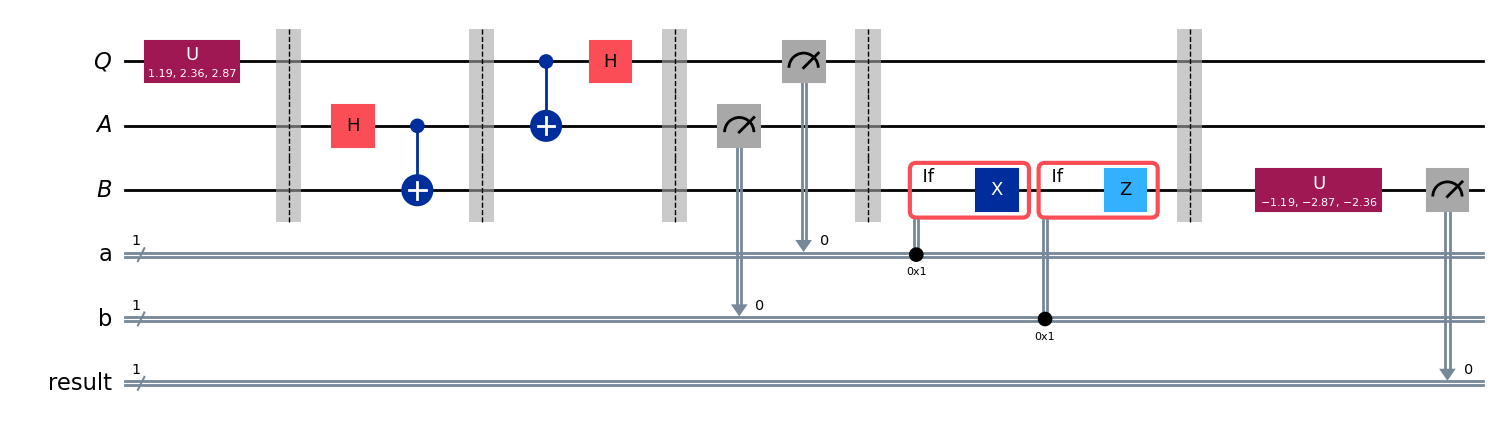

In [94]:
test = QuantumCircuit(qubit, ebit_0, ebit_1, a, b)

# apply gate to Q
test.append(random_gate, qubit)
test.barrier()

# add teleportation protocol
test = test.compose(teleportation_protocol)
test.barrier()

# apply inverse of the gate at the any and measure
test.append(random_gate.inverse(), ebit_1)

result = ClassicalRegister(1, 'result')
test.add_register(result)

test.measure(ebit_1, result)

test.draw('mpl')

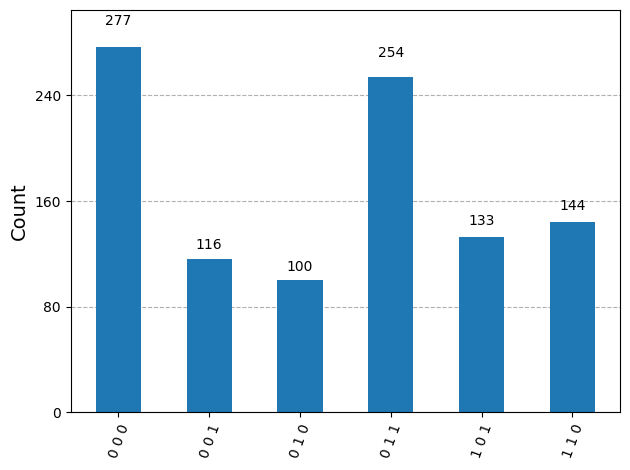

In [95]:
# Run protocol on Aer Simulator

result = AerSimulator().run(test).result()
stats = result.get_counts()

plot_histogram(stats)